In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
df = pd.read_csv("./datasets/advertising.csv")
df.head()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad
0,68.95,35,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,2016-03-27 00:53:11,0
1,80.23,31,68441.85,193.77,Monitored national standardization,West Jodi,1,Nauru,2016-04-04 01:39:02,0
2,69.47,26,59785.94,236.50,Organic bottom-line service-desk,Davidton,0,San Marino,2016-03-13 20:35:42,0
3,74.15,29,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,1,Italy,2016-01-10 02:31:19,0
4,68.37,35,73889.99,225.58,Robust logistical utilization,South Manuel,0,Iceland,2016-06-03 03:36:18,0


In [3]:
del df['Ad Topic Line']
del df['City']
del df['Country']
del df['Timestamp']
del df['Male']

In [4]:
from sklearn.preprocessing import StandardScaler

In [5]:
scaler = StandardScaler()
scaler.fit(df)
scaled_data = scaler.transform(df)

In [7]:
from sklearn.decomposition import PCA

In [9]:
pca = PCA(n_components=2)

In [10]:
pca.fit(scaled_data)
scaled_pca = pca.transform(scaled_data)
scaled_data.shape

(1000, 5)

In [11]:
scaled_pca.shape

(1000, 2)

Text(0, 0.5, 'Second principle components')

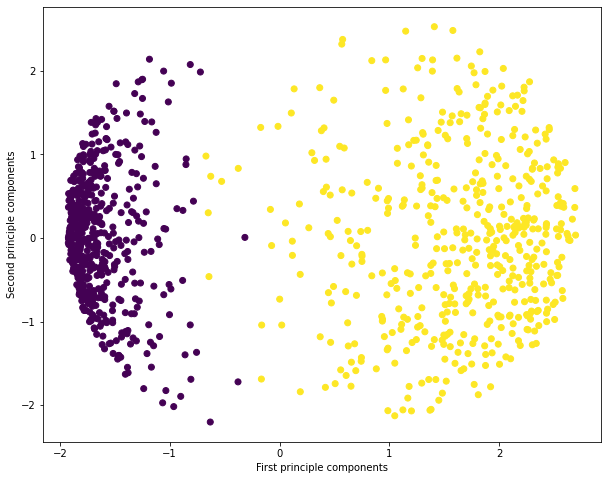

In [15]:
#state the size of plot
plt.figure(figsize=(10,8))
plt.scatter(scaled_pca[:,0],scaled_pca[:,1],c=df['Clicked on Ad']) #color code by clicked on ad
plt.xlabel("First principle components")
plt.ylabel("Second principle components")

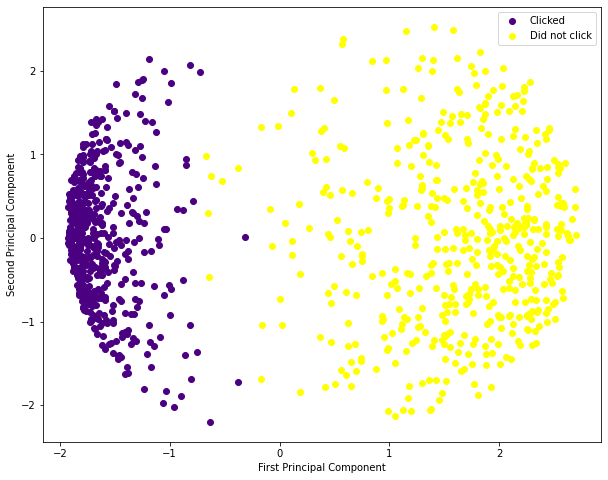

In [17]:
plt.figure(figsize=(10,8))
legend = df['Clicked on Ad']
#Add indigo and yellow RGB colors
colors = {0: '#4B0082', 1: '#FFFF00'}
labels = {0: 'Clicked', 1: 'Did not click'}

#Use a for-loop to set color for each data point
for t in np.unique(legend):
    ix = np.where(legend == t)
    plt.scatter(scaled_pca[ix,0], scaled_pca[ix,1], c=colors[t], label=labels[t])
    
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component') 
plt.legend()
plt.show()